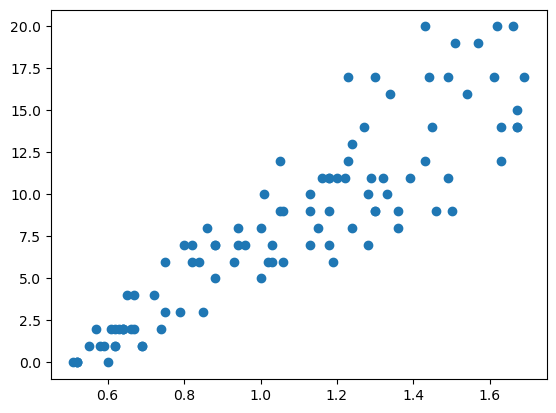

In [2]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("../data/age_data_1.txt")
x, y = data.T

plt.scatter(x,y)

# Modelo linear

$$
y_m = ax + b
$$

In [55]:
class Model:
    def __init__(self, a, b):
        self.a = a
        self.b = b
        
    def __call__(self, x):
        return self.a * x + self.b

    def copy(self):
        return Model(self.a, self.b)

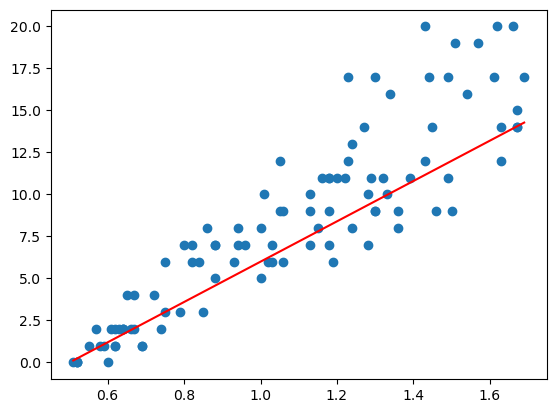

In [64]:
model = Model(a=12, b=-6)

xm = np.linspace(x.min(), x.max())
ym = model(xm)

plt.scatter(x, y)
plt.plot(xm, ym, c="r")

# Erro quadrático médio

$$
e=\frac{1}{n}\sum_{i=1}^{n}{(y(i)-y_m(i))^2}
$$

In [14]:
def mse(model, x, y):
    ym = model(x)
    error = np.mean((y-ym)**2)
    return error

In [15]:
mse(model, x, y)

8.027488

In [51]:
def get_local_error(model, x, y, range=1):
    size = 20
    a, b = model.a, model.b
    
    a_vals = np.linspace(a - range, a + range, size)
    b_vals = np.linspace(b - range, b + range, size)

    error_grid = np.zeros((size, size))
    for i, b in enumerate(b_vals):
        for j, a in enumerate(a_vals):
            stub_model = Model(a, b)
            error = mse(stub_model, x, y)
            error_grid[i,j] = error
            
    return error_grid, a_vals, b_vals

def plot_local_error(model, x, y, range=5):
    error_grid, a_vals, b_vals = get_local_error(model, x, y, range=5)
    plt.figure()
    plt.contourf(a_vals, b_vals, np.log(error_grid), levels=40)
    plt.xlabel("Slope")
    plt.ylabel("Intercept")

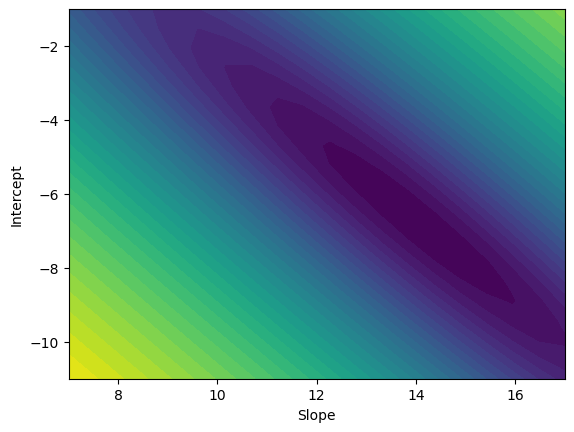

In [52]:
plot_local_error(model, x, y, range=5)

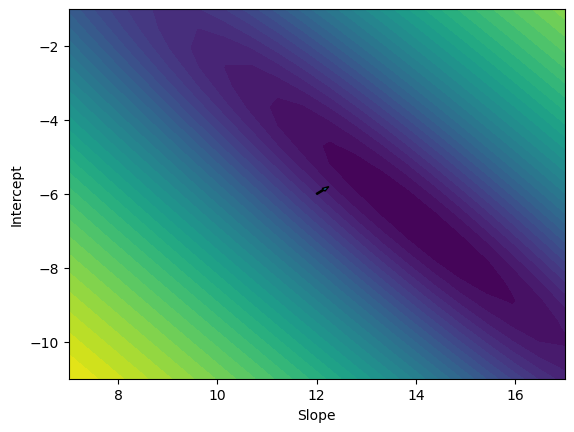

In [53]:
def mse_grad(model, x, y):
    n = len(x)
    ym = model(x)
    grad_a = -2*np.sum((y-ym)*x)/n
    grad_b = -2*np.sum(y-ym)/n

    return grad_a, grad_b

grad = mse_grad(model, x, y)
plot_local_error(model, x, y)
lr = 0.04
plt.arrow(model.a, model.b, -lr*grad[0], -lr*grad[1], width=0.03)

In [49]:
def step(model, x, y, lr):
    grad_a, grad_b = mse_grad(model, x, y)
    model.a = model.a - lr*grad_a
    model.b = model.b - lr*grad_b

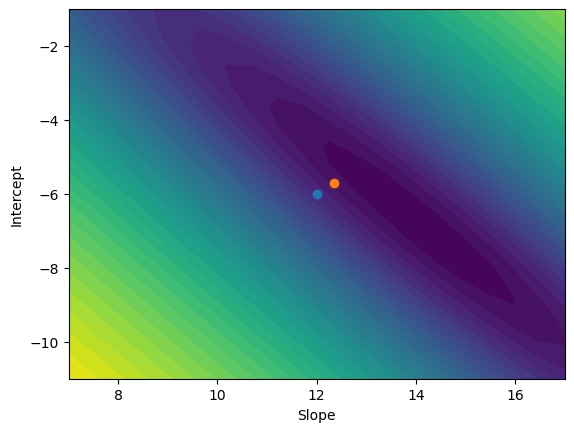

In [65]:
original_model = model.copy()
step(model, x, y, lr=0.1)

plot_local_error(original_model, x, y, range=1)
plt.scatter(original_model.a, original_model.b)
plt.scatter(model.a, model.b)

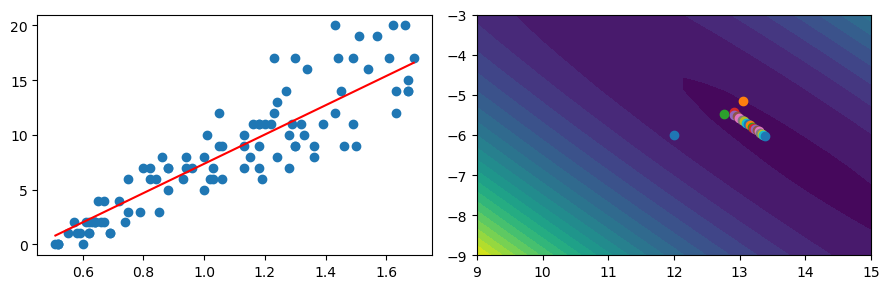

In [83]:
from IPython import display

def plot_figure(model, x, y, fig=None):
    xm = np.linspace(x.min(), x.max())
    ym = model(xm)

    error_grid, a_vals, b_vals = get_local_error(model, x, y, range=3)
    if fig is None:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,3))

        ax1.scatter(x, y)
        ax1.plot(xm, ym, color="r")
    
        ax2.contourf(a_vals, b_vals, error_grid, levels=20)
        ax2.scatter(model.a, model.b)

        plt.tight_layout()
        plt.close()
    else:
        ax1, ax2 = fig.axes
        ax1.lines[0].set_data(xm, ym)
        ax2.scatter(model.a, model.b)

    display.clear_output(wait=False)
    display.display(fig)
    return fig

def train(model, x, y, lr, num_epochs):
    fig = plot_figure(model, x, y)

    for _ in range(num_epochs):
        print(mse(model,x,y))
        step(model, x, y, lr)
        plot_figure(model, x, y, fig)

model = Model(a=12, b=-6)
train(model, x, y, lr=0.3, num_epochs=20)